# Build the Model
okay im gonna build a regression model first. for the targets, owners, players, copiesSold, revenue.

so basically the dev can enter pre release data and they should be able to enter the release date that they are planning on to release and the extract date so the model will predict the success up till that extract date, tell me if is it better or not instead of just predicting the success without defining a clear deadline because the stats constantly changes. and also for the developers and the publishers. developers and publishers have been seperated into multiple columns for each dev or pub too. even tho entering the other pre release data mandatory, if its a new dev and new publisher they should be able to enter their new publisher name and new dev name or else not enter it if they are new, or they can choose from the already available developer and publisher list.

For release and extract dates, they have already been separated into these columns and: 'release_year', 'release_month', 'release_day', 'extract_year', 'extract_month', 'extract_day'

And there is no columns called release_date and extract_date in the dataset

And for the developers and publishers: they also have been separated into multiple columns for each dev and pub

Target columns (multi-output regression): 'owners', 'players', 'copiesSold', 'revenue'

Consider training one model using a multi-output regressor like: MultiOutputRegressor with XGBoost/LightGBM

now give me the full ML pipeline for my model

Here is all the data you need:
"recent_500_games_2023.csv"

## Import Libraries

In [182]:
# from google.colab import drive
# drive.mount('/content/drive')

In [183]:
import os
import subprocess
import sys

# # Step 1: Create virtual environment if it doesn't exist
# venv_dir = "venv"
# if not os.path.exists(venv_dir):
#     print("Creating virtual environment...")
#     subprocess.check_call([sys.executable, "-m", "venv", venv_dir])
#     print("Virtual environment created at:", venv_dir)

# Step 2: Activate virtual environment (only needed for shell use, not within script)
# On Windows: venv\Scripts\activate
# On Unix/macOS: source venv/bin/activate
# Note: From within a Python script, pip will install in the active environment.

# Step 3: Install required packages
required_packages = [
    "numpy",
    "pandas",
    "tabulate",
    "beautifulsoup4",
    "seaborn",
    "matplotlib",
    "scikit-learn",
    "xgboost",
    "lightgbm",
    "tabulate",
    "joblib",
    "pathlib",
]

# print("Installing required packages...")
# for package in required_packages:
#     try:
#         print(f"\nInstalling: {package}")
#         subprocess.check_call([sys.executable, "-m", "pip", "install", package])
#         print(f"Successfully installed: {package}")
#     except subprocess.CalledProcessError as e:
#         print(f"Failed to install: {package}\nError: {e}")

# print("All packages installed successfully.")

# Step 4: Now import your packages
import csv
import json
import statistics
import time
import datetime
import sys
import numpy as np
import pandas as pd
from tabulate import tabulate
from ast import literal_eval
import itertools
import re
import ast
from bs4 import BeautifulSoup
from collections import Counter
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from tabulate import tabulate
from pathlib import Path

In [184]:
# Define the paths
# dataset_dir = "/content/drive/MyDrive/Colab Notebooks/steamdata/experimental/datasets_final"

artifact_dir = "./artifacts/"

## Data loading


In [185]:
# import pandas as pd

steam_dataset = pd.read_csv(f'games_2020_to_2023_6.csv')
display(steam_dataset.head())

,steamid,name,price,is_free,release_year,release_month,release_day,extract_year,extract_month,extract_day,...,Racing,players,owners,wishlists,copiesSold,revenue,avgPlaytime,followers,reviews,reviewScore
0,1313,SiN: Gold,9.99,0,2020.0,3.0,18.0,2025,2,20,...,0,45474,117604,30800.0,8203,26296.0,2.935019,124,391,80
1,7800,Stubbs the Zombie in Rebel Without a Pulse,19.99,0,2021.0,3.0,16.0,2025,2,20,...,0,191747,810495,74800.0,42861,312569.0,3.425451,348,2209,87
2,11550,Second Sight,9.99,0,2021.0,4.0,8.0,2025,2,20,...,0,9244,50844,22000.0,7734,46939.0,3.925038,1435,251,80
3,12210,Grand Theft Auto IV: The Complete Edition,19.99,0,2020.0,3.0,24.0,2025,2,20,...,0,8427931,10830504,825000.0,7348488,46373213.0,28.910586,167772,169628,82
4,24010,Train Simulator Classic 2024,29.99,0,2023.0,4.0,27.0,2025,2,20,...,0,1221331,1669316,147400.0,801289,14362602.0,66.620954,80817,27857,71


In [186]:
steam_dataset.head(10)

,steamid,name,price,is_free,release_year,release_month,release_day,extract_year,extract_month,extract_day,...,Racing,players,owners,wishlists,copiesSold,revenue,avgPlaytime,followers,reviews,reviewScore
0,1313,SiN: Gold,9.99,0,2020.0,3.0,18.0,2025,2,20,...,0,45474,117604,30800.0,8203,26296.0,2.935019,124,391,80
1,7800,Stubbs the Zombie in Rebel Without a Pulse,19.99,0,2021.0,3.0,16.0,2025,2,20,...,0,191747,810495,74800.0,42861,312569.0,3.425451,348,2209,87
2,11550,Second Sight,9.99,0,2021.0,4.0,8.0,2025,2,20,...,0,9244,50844,22000.0,7734,46939.0,3.925038,1435,251,80
3,12210,Grand Theft Auto IV: The Complete Edition,19.99,0,2020.0,3.0,24.0,2025,2,20,...,0,8427931,10830504,825000.0,7348488,46373213.0,28.910586,167772,169628,82
4,24010,Train Simulator Classic 2024,29.99,0,2023.0,4.0,27.0,2025,2,20,...,0,1221331,1669316,147400.0,801289,14362602.0,66.620954,80817,27857,71
5,45200,Defense of the Oasis,4.99,0,2020.0,8.0,25.0,2025,2,20,...,0,2496,2496,2736.0,2479,11133.0,12.753073,228,56,93
6,226280,Warp Frontier,14.99,0,2021.0,9.0,28.0,2025,2,20,...,0,1440,1440,12100.0,1056,9869.0,6.010187,1140,45,91
7,226620,Desktop Dungeons,14.99,0,2023.0,4.0,18.0,2025,2,20,...,0,224745,2214202,49500.0,90444,546152.0,11.099101,12836,2253,84
8,251650,Ray's The Dead,19.99,0,2020.0,10.0,22.0,2025,2,20,...,0,2575,10301,9900.0,1428,20773.0,4.582969,2107,60,62
9,252870,PULSAR: Lost Colony,19.99,0,2021.0,6.0,22.0,2025,2,20,...,0,377985,442586,308000.0,292004,5036917.0,15.263358,104141,5511,90


## Data Cleaning

In [187]:
# Only show columns with missing values
missing = steam_dataset.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))

wishlists    5
dtype: int64


In [188]:
steam_dataset = steam_dataset.dropna(subset=['wishlists'])

In [189]:
targets = ['owners', 'players', 'copiesSold', 'revenue']

In [190]:
steam_dataset = steam_dataset.dropna(subset=targets)

# Optional: Drop rows where all targets are 0 (very low value for training)
steam_dataset = steam_dataset[~((steam_dataset[targets] == 0).all(axis=1))]

### Confirm the data types

In [191]:
print(steam_dataset.dtypes)

steamid                         int64
name                           object
price                         float64
is_free                         int64
release_year                  float64
release_month                 float64
release_day                   float64
extract_year                    int64
extract_month                   int64
extract_day                     int64
publisherClass_encoded          int64
required_age                    int64
achievements                    int64
english                         int64
windows                         int64
mac                             int64
linux                           int64
Single-player                   int64
Family Sharing                  int64
Steam Achievements              int64
Steam Cloud                     int64
Full controller support         int64
Multi-player                    int64
Partial Controller Support      int64
Steam Trading Cards             int64
PvP                             int64
Co-op       

In [192]:
df = steam_dataset.drop(['steamid', 'name'], axis=1)

In [193]:
print(df.dtypes.value_counts())

int64      47
float64     7
Name: count, dtype: int64


In [194]:
print(df.dtypes[df.dtypes == 'int64'])

is_free                       int64
extract_year                  int64
extract_month                 int64
extract_day                   int64
publisherClass_encoded        int64
required_age                  int64
achievements                  int64
english                       int64
windows                       int64
mac                           int64
linux                         int64
Single-player                 int64
Family Sharing                int64
Steam Achievements            int64
Steam Cloud                   int64
Full controller support       int64
Multi-player                  int64
Partial Controller Support    int64
Steam Trading Cards           int64
PvP                           int64
Co-op                         int64
Steam Leaderboards            int64
Remote Play Together          int64
Online PvP                    int64
Shared/Split Screen           int64
Tracked Controller Support    int64
VR Only                       int64
Shared/Split Screen PvP     

In [195]:
df = df.astype({'required_age': 'float64'})

In [196]:
print(df.dtypes.value_counts())

int64      46
float64     8
Name: count, dtype: int64


### Check for NaN's

In [197]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

price                     0
is_free                   0
release_year              0
release_month             0
release_day               0
extract_year              0
extract_month             0
extract_day               0
publisherClass_encoded    0
required_age              0
dtype: int64


In [198]:
df = df.dropna()

## Feature Engineering

In [199]:
# Calculate days between release and extract
# from datetime import datetime
# import pandas as pd

# Function to convert year, month, day to datetime
def make_date(row, prefix):
    return datetime(int(row[f'{prefix}_year']), int(row[f'{prefix}_month']), int(row[f'{prefix}_day']))

# Apply to each row
df['release_date'] = df.apply(lambda row: make_date(row, 'release'), axis=1)
df['extract_date'] = df.apply(lambda row: make_date(row, 'extract'), axis=1)

# Calculate the number of days between release and extract
df['days_since_release'] = (df['extract_date'] - df['release_date']).dt.days

# Drop original datetime columns if not needed
df.drop(['release_date', 'extract_date',
         'release_year', 'release_month', 'release_day',
         'extract_year', 'extract_month', 'extract_day'], axis=1, inplace=True)

In [200]:
print(df.columns[df.isnull().any()])
print(df.dtypes.value_counts())

Index([], dtype='object')
int64      44
float64     5
Name: count, dtype: int64


In [201]:
print(df.dtypes[df.dtypes == 'int64'])

is_free                       int64
publisherClass_encoded        int64
achievements                  int64
english                       int64
windows                       int64
mac                           int64
linux                         int64
Single-player                 int64
Family Sharing                int64
Steam Achievements            int64
Steam Cloud                   int64
Full controller support       int64
Multi-player                  int64
Partial Controller Support    int64
Steam Trading Cards           int64
PvP                           int64
Co-op                         int64
Steam Leaderboards            int64
Remote Play Together          int64
Online PvP                    int64
Shared/Split Screen           int64
Tracked Controller Support    int64
VR Only                       int64
Shared/Split Screen PvP       int64
Online Co-op                  int64
Stats                         int64
Shared/Split Screen Co-op     int64
Indie                       

In [202]:
df = df.astype({'days_since_release': 'float64'})

In [203]:
print(df.columns[df.isnull().any()])
print(df.dtypes.value_counts())

Index([], dtype='object')
int64      43
float64     6
Name: count, dtype: int64


In [204]:
display(df.head())

,price,is_free,publisherClass_encoded,required_age,achievements,english,windows,mac,linux,Single-player,...,players,owners,wishlists,copiesSold,revenue,avgPlaytime,followers,reviews,reviewScore,days_since_release
0,9.99,0,1,0.0,0,1,1,0,0,1,...,45474,117604,30800.0,8203,26296.0,2.935019,124,391,80,1800.0
1,19.99,0,1,18.0,35,1,1,0,0,1,...,191747,810495,74800.0,42861,312569.0,3.425451,348,2209,87,1437.0
2,9.99,0,2,0.0,0,1,1,0,0,1,...,9244,50844,22000.0,7734,46939.0,3.925038,1435,251,80,1414.0
3,19.99,0,3,18.0,55,1,1,0,0,1,...,8427931,10830504,825000.0,7348488,46373213.0,28.910586,167772,169628,82,1794.0
4,29.99,0,1,0.0,1384,1,1,0,0,1,...,1221331,1669316,147400.0,801289,14362602.0,66.620954,80817,27857,71,665.0


In [205]:
cols_to_front = [
    'price',
    'is_free',
    'publisherClass_encoded',
    'days_since_release',
]

cols = df.columns.tolist()

# Remove these columns from the current list
for c in cols_to_front:
    if c in cols:
        cols.remove(c)

# New order: these front columns first, then the rest
new_order = cols_to_front + cols

df = df[new_order]


In [206]:
display(df)

,price,is_free,publisherClass_encoded,days_since_release,required_age,achievements,english,windows,mac,linux,...,Racing,players,owners,wishlists,copiesSold,revenue,avgPlaytime,followers,reviews,reviewScore
0,9.99,0,1,1800.0,0.0,0,1,1,0,0,...,0,45474,117604,30800.0,8203,26296.0,2.935019,124,391,80
1,19.99,0,1,1437.0,18.0,35,1,1,0,0,...,0,191747,810495,74800.0,42861,312569.0,3.425451,348,2209,87
2,9.99,0,2,1414.0,0.0,0,1,1,0,0,...,0,9244,50844,22000.0,7734,46939.0,3.925038,1435,251,80
3,19.99,0,3,1794.0,18.0,55,1,1,0,0,...,0,8427931,10830504,825000.0,7348488,46373213.0,28.910586,167772,169628,82
4,29.99,0,1,665.0,0.0,1384,1,1,0,0,...,0,1221331,1669316,147400.0,801289,14362602.0,66.620954,80817,27857,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39189,6.99,0,0,421.0,0.0,0,1,1,0,0,...,0,15,15,1100.0,1,6.0,0.000000,5,1,0
39190,0.00,1,0,420.0,0.0,16,0,1,0,0,...,0,1084,1084,1188.0,1072,0.0,1.073614,99,26,81
39191,6.99,0,0,419.0,0.0,0,1,1,0,0,...,0,167,167,492.0,83,510.0,0.933962,41,12,75
39192,0.99,0,0,417.0,0.0,0,1,1,0,0,...,0,30,30,96.0,30,19.0,0.352083,8,2,100


In [207]:
print(df.columns[df.isnull().any()])
print(df.dtypes.value_counts())

Index([], dtype='object')
int64      43
float64     6
Name: count, dtype: int64


## Data Visualization

### Distribution of Target Variables

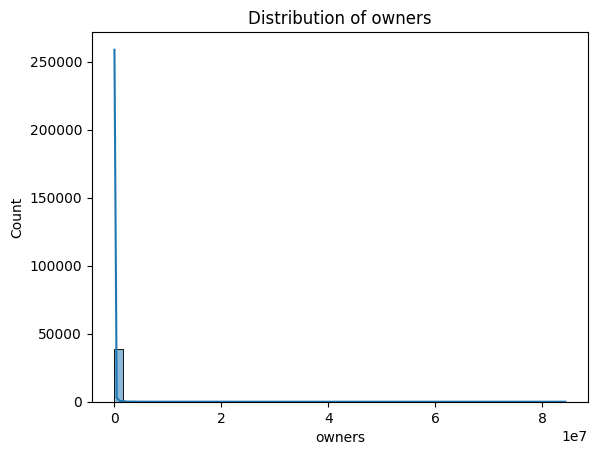

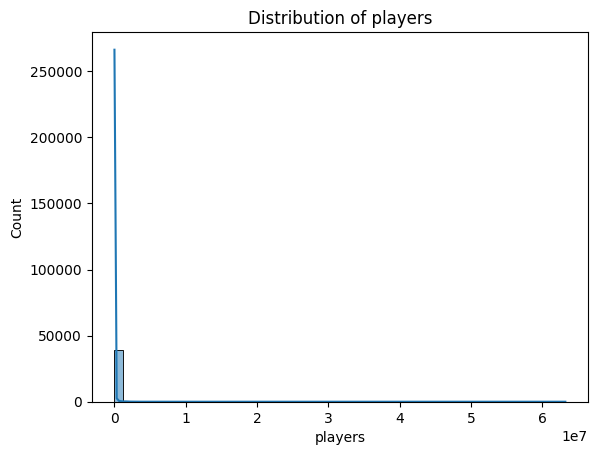

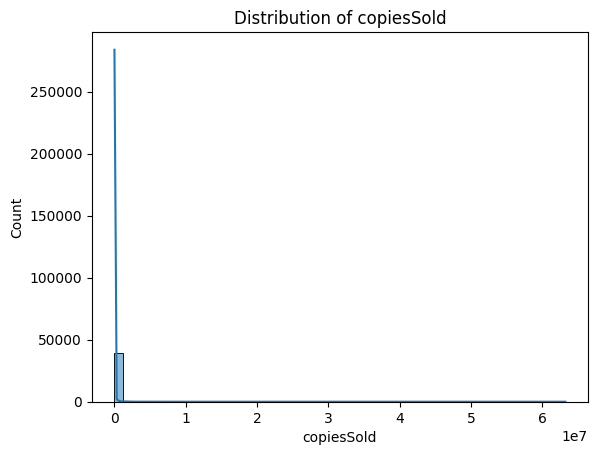

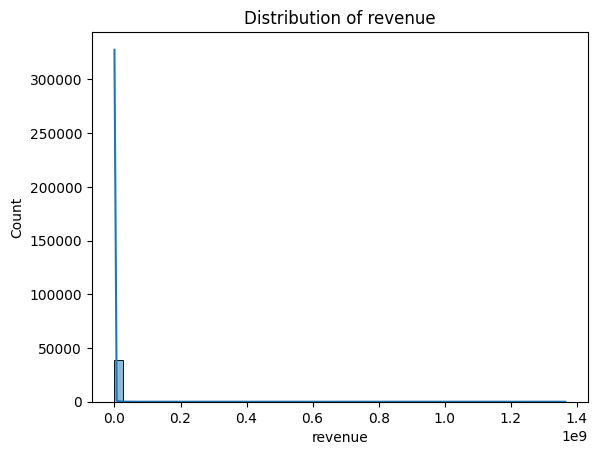

In [208]:
# import seaborn as sns
# import matplotlib.pyplot as plt

target_cols = ['owners', 'players', 'copiesSold', 'revenue']
for col in target_cols:
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

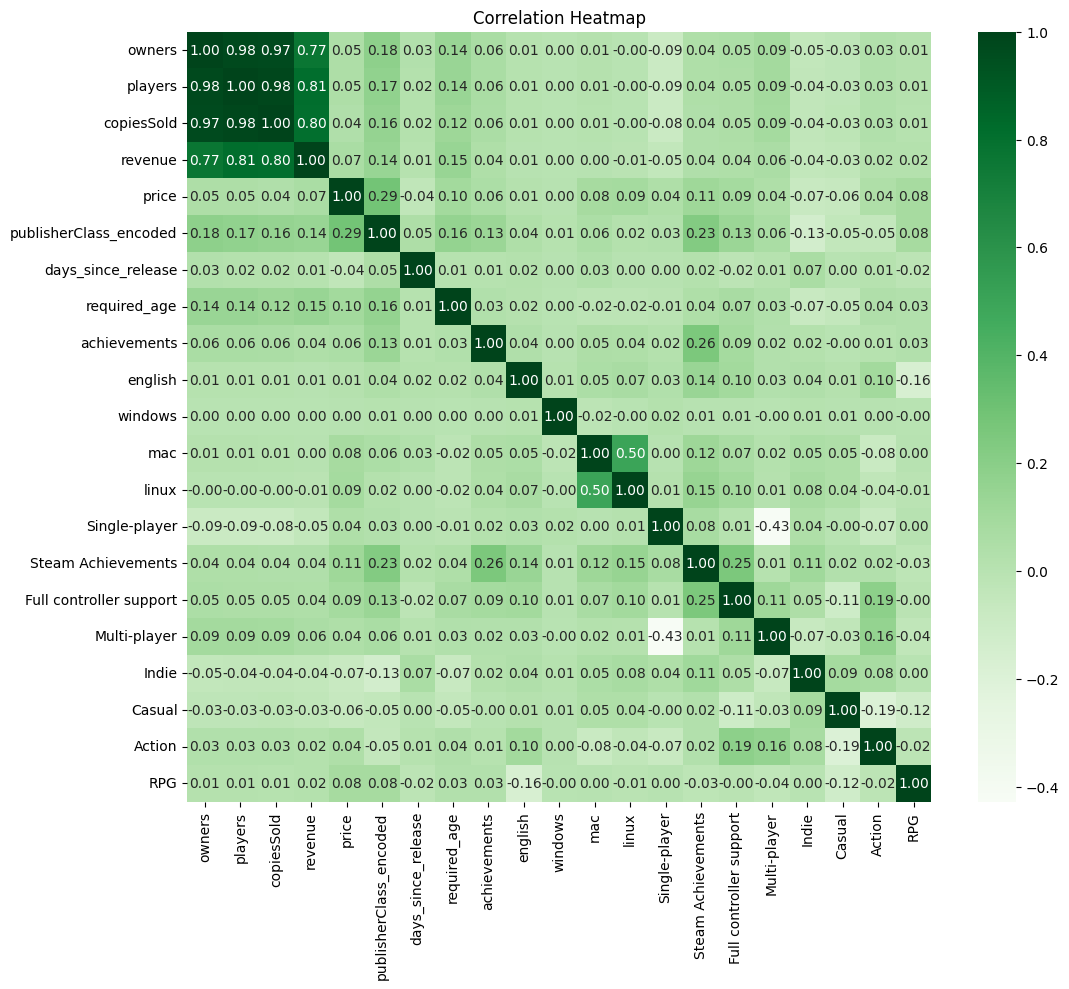

In [209]:
# import numpy as np

features_cols = [
    'price',
    # 'is_free',
    'publisherClass_encoded',
    'days_since_release',
    'required_age',
    'achievements',
    'english',
    'windows',
    'mac',
    'linux',

    'Single-player',
    # 'Family Sharing',
    'Steam Achievements',
    # 'Steam Cloud',
    'Full controller support',
    'Multi-player',
    # 'Partial Controller Support',
    # 'Steam Trading Cards',
    # 'PvP',
    # 'Co-op',
    # 'Steam Leaderboards',
    # 'Remote Play Together',
    # 'Online PvP',
    # 'Shared/Split Screen',
    # 'Tracked Controller Support',
    # 'VR Only',
    # 'Shared/Split Screen PvP',
    # 'Online Co-op',
    # 'Stats',
    # 'Shared/Split Screen Co-op',

    'Indie',
    'Casual',
    # 'Adventure',
    'Action',
    # 'Simulation',
    # 'Strategy',
    'RPG',
    # 'Free To Play',
    # 'Sports',
    # 'Racing',

    # 'wishlists',
    # 'followers'
]

plt.figure(figsize=(12, 10))
corr = df[target_cols + features_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Greens")
plt.title('Correlation Heatmap')
plt.show()

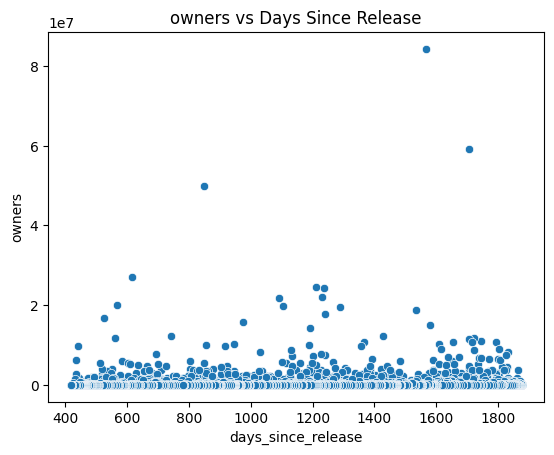

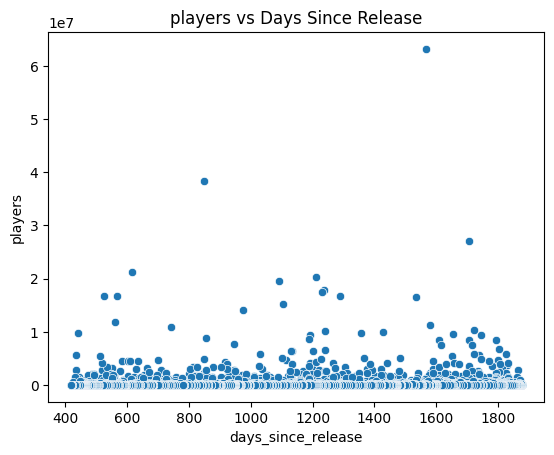

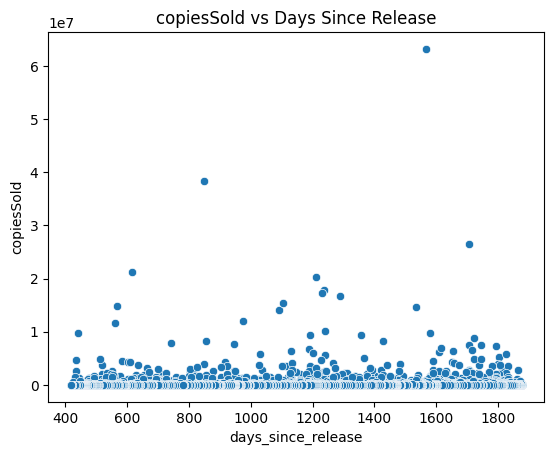

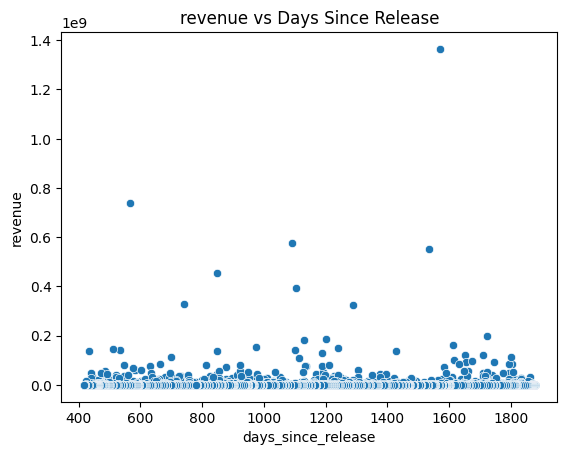

In [210]:
for target in target_cols:
    sns.scatterplot(data=df, x='days_since_release', y=target)
    plt.title(f'{target} vs Days Since Release')
    plt.show()

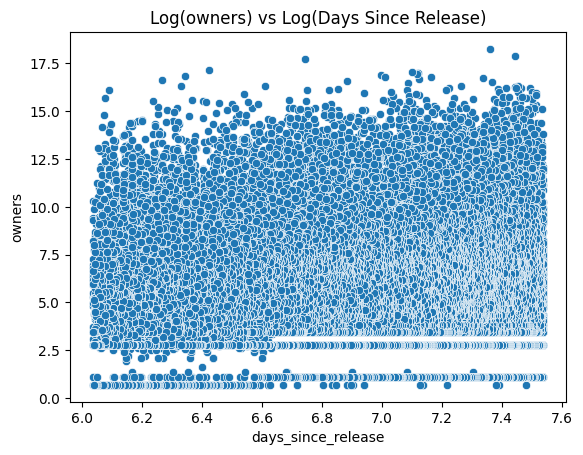

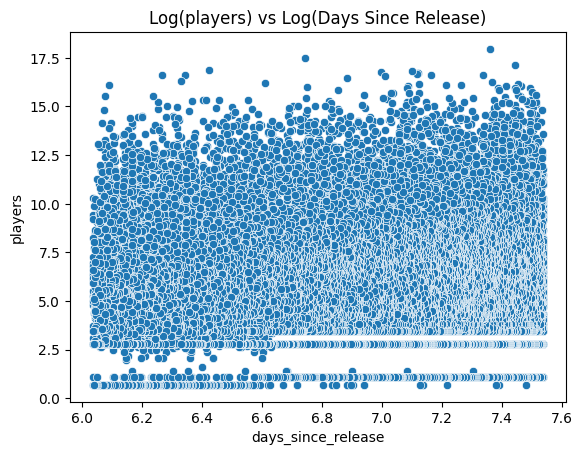

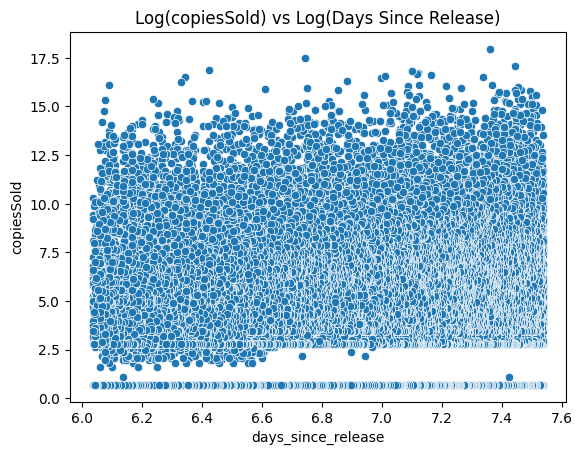

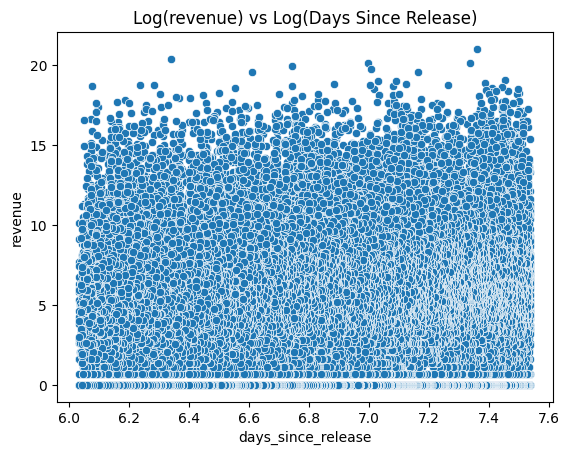

In [211]:
for target in target_cols:
    sns.scatterplot(data=df, x=np.log1p(df['days_since_release']), y=np.log1p(df[target]))
    plt.title(f'Log({target}) vs Log(Days Since Release)')
    plt.show()

In [212]:
# import numpy as np

for target in target_cols:
    q1 = df[target].quantile(0.25)
    q3 = df[target].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]
    print(f"{target}: {len(outliers)} outliers")

owners: 7024 outliers
players: 6419 outliers
copiesSold: 6488 outliers
revenue: 7354 outliers


## Data Splitting

In [213]:
# Sanitize column names: keep only letters, numbers, and underscores
# import re

def sanitize_column_names(columns):
    sanitized = []
    for col in columns:
        # Replace non-alphanumeric characters with underscore
        clean_col = re.sub(r'[^A-Za-z0-9_]+', '_', col)
        sanitized.append(clean_col)
    return sanitized

# Apply sanitization to your DataFrame
df.columns = sanitize_column_names(df.columns)

In [214]:
# from sklearn.model_selection import train_test_split

target_cols = [
    'owners',
    'players',
    'copiesSold',
    'revenue'
    ]

post_release = [
    'wishlists', 
    'avgPlaytime', 
    'followers', 
    'reviews', 
    'reviewScore'
    ]

# Define features (X) and targets (y)
X = df.drop(columns=target_cols + post_release)
y = df[target_cols]

# Split: 80% train, 20% test (you can adjust test_size if you want)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 31351 samples
Testing set size: 7838 samples


## Feature Engineering

## Model Training

In [215]:
# import numpy as np
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import xgboost as xgb
# import lightgbm as lgb

### Only for one target

In [216]:
def train_and_evaluate(model, X_train, y_train_log, X_test, y_test_log):
    """
    Train a multi-output regressor using log-transformed targets, then evaluate on original scale.
    """
    # Wrap the model for multi-output regression
    multioutput_model = MultiOutputRegressor(model)

    # Convert to numpy arrays for safety
    X_train_np = X_train.values if hasattr(X_train, "values") else X_train
    X_test_np = X_test.values if hasattr(X_test, "values") else X_test
    y_train_np = y_train_log.values
    y_test_np = y_test_log.values

    # Train the model
    multioutput_model.fit(X_train_np, y_train_np)

    # Predict in log scale
    y_pred_log = multioutput_model.predict(X_test_np)

    # Invert the log1p transformation
    y_pred = np.expm1(y_pred_log)
    y_test = np.expm1(y_test_np)

    # Evaluate on original scale
    rmse_list = []
    mae_list = []
    r2_list = []

    for i, target_name in enumerate(y_test_log.columns):
        rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i]))
        mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
        r2 = r2_score(y_test[:, i], y_pred[:, i])
        rmse_list.append(rmse)
        mae_list.append(mae)
        r2_list.append(r2)
        print(f"Target: {target_name} — RMSE: {rmse:.3f}, MAE: {mae:.3f}, R^2: {r2:.3f}")

    print(f"Average RMSE: {np.mean(rmse_list):.3f}")
    print(f"Average MAE: {np.mean(mae_list):.3f}")
    print(f"Average R^2: {np.mean(r2_list):.3f}")

    return multioutput_model

### Per target

In [217]:
# def train_and_evaluate_per_target(best_models, X_train, y_train_log, X_test, y_test_log):
#     """
#     Train and evaluate a separate model for each target using log-transformed targets.
#     """
#     y_pred_log_all = []
#     y_test_log_all = []

#     rmse_list = []
#     mae_list = []
#     r2_list = []

#     for i, target in enumerate(y_train_log.columns):
#         print(f"\nTraining optimized model for: {target}")
#         model = best_models[target]

#         # Extract log-transformed target for current column
#         y_train_target = y_train_log[target].values
#         y_test_target = y_test_log[target].values

#         # Train model
#         model.fit(X_train, y_train_target)

#         # Predict and invert log
#         y_pred_log = model.predict(X_test)
#         y_pred = np.expm1(y_pred_log)
#         y_true = np.expm1(y_test_target)

#         # Store predictions
#         y_pred_log_all.append(y_pred_log)
#         y_test_log_all.append(y_test_target)

#         # Metrics
#         rmse = np.sqrt(mean_squared_error(y_true, y_pred))
#         mae = mean_absolute_error(y_true, y_pred)
#         r2 = r2_score(y_true, y_pred)

#         rmse_list.append(rmse)
#         mae_list.append(mae)
#         r2_list.append(r2)

#         print(f"🔹 RMSE: {rmse:.3f}, MAE: {mae:.3f}, R²: {r2:.3f}")

#     print(f"\n📊 Average RMSE: {np.mean(rmse_list):.3f}")
#     print(f"📊 Average MAE: {np.mean(mae_list):.3f}")
#     print(f"📊 Average R²: {np.mean(r2_list):.3f}")

#     return best_models

## Train LightBGM Model

### Tune Hyperparameters

In [218]:
# # from sklearn.model_selection import RandomizedSearchCV
# # import lightgbm as lgb
# # import numpy as np

# # Define the base model
# base_lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

# # Define the parameter grid
# param_dist = {
#     'n_estimators': [100, 200, 500, 1000],
#     'learning_rate': [0.005, 0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7, 10, -1],
#     'num_leaves': [15, 31, 63, 127],
#     'min_child_samples': [10, 20, 30, 50],
# }

# # Targets
# target_for_tuning = 'copiesSold'

# # # Run RandomizedSearchCV on one target
# tuner = RandomizedSearchCV(base_lgbm,
#                            param_distributions=param_dist,
#                            n_iter=30,
#                            scoring='neg_root_mean_squared_error',
#                            cv=3,
#                            verbose=1,
#                            random_state=42,
#                            n_jobs=-1)

# # Fit tuning on a single output
# tuner.fit(X_train, y_train[target_for_tuning])

###########################################

# # Define the base model
# base_lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

# # Define the parameter grid
# param_dist = {
#     'n_estimators': [300, 500, 1000],
#     'learning_rate': [0.01, 0.05],
#     'max_depth': [7, 10, -1],
#     'num_leaves': [31, 63, 127],
#     'min_child_samples': [5, 10, 20],
# }

# # List of targets to tune for
# targets = ["owners", "players", "copiesSold", "revenue"]

# # Dictionary to store best models per target
# best_models = {}
# best_params_per_target = {}

# # Loop through each target and tune separately
# for target in targets:
#     print(f"\n🔍 Tuning model for target: {target}")
#     tuner = RandomizedSearchCV(
#         base_lgbm,
#         param_distributions=param_dist,
#         n_iter=30,
#         scoring="neg_root_mean_squared_error",
#         cv=3,
#         verbose=1,
#         random_state=42,
#         n_jobs=-1,
#     )

#     tuner.fit(X_train, y_train[target])

#     best_models[target] = tuner.best_estimator_
#     best_params_per_target[target] = tuner.best_params_
#     best_params = best_params_per_target[target]

# print("\n✅ Tuning completed for all targets.")

### Log Transformation

### Train

In [219]:
best_params = {
    'n_estimators': 500,
    'learning_rate': 0.01,
    'max_depth': 7,
    'num_leaves': 63,
    'min_child_samples': 20
}

# print("Best parameters:", tuner.best_params_)

# # Use the best params for the final model
# best_params = tuner.best_params_
# lgb_model = lgb.LGBMRegressor(**best_params, random_state=42, n_jobs=-1)
lgb_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

# Apply log1p to targets
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Retrain with all targets
print("Training optimized LightGBM model...")
lgb_trained = train_and_evaluate(lgb_model, X_train, y_train_log, X_test, y_test_log)
# trained_models = train_and_evaluate_per_target(best_models, X_train, y_train_log, X_test, y_test_log)

Training optimized LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 31351, number of used features: 39
[LightGBM] [Info] Start training from score 6.493952
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 31351, number of used features: 39
[LightGBM] [Info] Start training from score 6.406776
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002898 seconds.
You can set `force_row_wise=true` to remove the o

d:\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
d:\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [220]:
import joblib

joblib.dump(lgb_trained, artifact_dir + "lgb_model2.pkl")

['./artifacts/lgb_model2.pkl']

In [221]:
# lgb_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)
# print("Training LightGBM model...")
# lgb_trained = train_and_evaluate(lgb_model, X_train, y_train, X_test, y_test)

In [222]:
# import matplotlib.pyplot as plt
# import lightgbm as lgb

# # Plot top 15 important features for each target
# for i, target_name in enumerate(y_train.columns):
#     print(f"\nTop features for: {target_name}")

#     # Get the fitted model (each target has its own estimator)
#     booster = lgb_trained.estimators_[i].booster_

#     # Plot feature importance based on gain
#     ax = lgb.plot_importance(booster,
#                              max_num_features=15,
#                              importance_type='split',
#                              figsize=(10, 6))

#     plt.title(f"LightGBM Feature Importance: {target_name}")
#     plt.tight_layout()
#     plt.show()

## XAI

In [223]:
# # Assuming you trained with: model = MultiOutputRegressor(lgb_model).fit(...)
# for i, target in enumerate(y_train.columns):
#     print(f"Explaining target: {target}")
#     single_model = lgb_trained.estimators_[i]  # Extract model for this target
#     explainer = shap.TreeExplainer(single_model)
#     shap_values = explainer.shap_values(X_test)

#     shap.summary_plot(shap_values, X_test, show=False)
#     plt.title(f"SHAP Summary Plot for: {target}")
#     plt.show()

## Prediction

In [224]:
features_used = [
    col for col in df.columns
    if col not in target_cols + post_release + ['steamid', 'name']
]

In [225]:
# Print the features used
print("Features used for prediction:")
for feature in features_used:
    print(f" - {feature}")

features_array = np.array(features_used)
joblib.dump(features_array, artifact_dir + "features_used.pkl")

Features used for prediction:
 - price
 - is_free
 - publisherClass_encoded
 - days_since_release
 - required_age
 - achievements
 - english
 - windows
 - mac
 - linux
 - Single_player
 - Family_Sharing
 - Steam_Achievements
 - Steam_Cloud
 - Full_controller_support
 - Multi_player
 - Partial_Controller_Support
 - Steam_Trading_Cards
 - PvP
 - Co_op
 - Steam_Leaderboards
 - Remote_Play_Together
 - Online_PvP
 - Shared_Split_Screen
 - Tracked_Controller_Support
 - VR_Only
 - Shared_Split_Screen_PvP
 - Online_Co_op
 - Stats
 - Shared_Split_Screen_Co_op
 - Indie
 - Casual
 - Adventure
 - Action
 - Simulation
 - Strategy
 - RPG
 - Free_To_Play
 - Sports
 - Racing


['./artifacts/features_used.pkl']

In [226]:
# import numpy as np
# import pandas as pd

def predict_game_success(user_input: dict, model, features_used: list, known_devs: list, known_pubs: list):
    """
    Predict success metrics for a new game based on user input.

    Parameters:
        user_input (dict): Raw user inputs.
        model: Trained MultiOutputRegressor model.
        features_used (list): List of feature column names used in training.
        known_devs (list): List of top N developer column names.
        known_pubs (list): List of top N publisher column names.
    """
    # 1. Base dictionary with all 0s
    input_data = {feature: 0 for feature in features_used}

    # 2. Basic direct inputs
    input_data['price'] = user_input.get('price', 0)
    input_data['is_free'] = int(user_input.get('is_free', False))
    input_data['required_age'] = user_input.get('required_age', 0)
    input_data['achievements'] = user_input.get('achievements', 0)
    input_data['english'] = int(user_input.get('english', True))

    # 3. Platform & features flags
    platform_flags = ['windows', 'mac', 'linux']
    tag_flags = [
        'Single-player', 'Family Sharing', 'Steam Achievements', 'Steam Cloud',
        'Full controller support', 'Multi-player', 'Partial Controller Support',
        'Steam Trading Cards', 'PvP', 'Co-op', 'Steam Leaderboards', 'Remote Play Together',
        'Online PvP', 'Shared/Split Screen', 'Tracked Controller Support', 'VR Only',
        'Shared/Split Screen PvP', 'Online Co-op', 'Stats', 'Shared/Split Screen Co-op'
    ]
    genre_flags = ['Indie', 'Casual', 'Adventure', 'Action', 'Simulation', 'Strategy', 'RPG', 'Free To Play', 'Sports', 'Racing']

    for flag in platform_flags + tag_flags + genre_flags:
        input_data[flag] = int(user_input.get(flag, False))

    # 4. Publisher Class (encoded)
    input_data['publisherClass_encoded'] = user_input.get('publisherClass_encoded', 0)

    # 5. Days Since Release
    release_date = pd.to_datetime(user_input['release_date'])
    extract_date = pd.to_datetime(user_input['extract_date'])
    input_data['days_since_release'] = (extract_date - release_date).days

    # 6. Developer one-hot encoding
    for dev_col in known_devs:
        if dev_col == f"dev__{user_input.get('developer', '')}":
            input_data[dev_col] = 1
        else:
            input_data[dev_col] = 0

    # 7. Publisher one-hot encoding
    for pub_col in known_pubs:
        if pub_col == f"pub__{user_input.get('publisher', '')}":
            input_data[pub_col] = 1
        else:
            input_data[pub_col] = 0

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])[features_used]

    # Predict (assume model was trained on log-transformed targets)
    y_pred_log = model.predict(input_df)
    y_pred = np.expm1(y_pred_log)  # Invert log1p

    return {
        'owners': int(y_pred[0][0]),
        'players': int(y_pred[0][1]),
        'copiesSold': int(y_pred[0][2]),
        'revenue': float(y_pred[0][3])
    }

In [227]:
# def predict_game_success(
#     user_input: dict,
#     models: dict,
#     features_used: list,
#     known_devs: list,
#     known_pubs: list,
# ):
#     """
#     Predict success metrics for a new game based on user input and per-target models.

#     Parameters:
#         user_input (dict): Raw user inputs.
#         models (dict): Dictionary of trained models per target.
#         features_used (list): List of feature column names used in training.
#         known_devs (list): List of top N developer column names.
#         known_pubs (list): List of top N publisher column names.

#     Returns:
#         dict: Dictionary with predicted values (original scale).
#     """

#     # 1. Create base input vector
#     input_data = {feature: 0 for feature in features_used}

#     # 2. Fill direct fields
#     input_data["price"] = user_input.get("price", 0)
#     input_data["is_free"] = int(user_input.get("is_free", False))
#     input_data["required_age"] = user_input.get("required_age", 0)
#     input_data["achievements"] = user_input.get("achievements", 0)
#     input_data["english"] = int(user_input.get("english", True))

#     # 3. Platform & features flags
#     platform_flags = ["windows", "mac", "linux"]
#     tag_flags = [
#         "Single-player",
#         "Family Sharing",
#         "Steam Achievements",
#         "Steam Cloud",
#         "Full controller support",
#         "Multi-player",
#         "Partial Controller Support",
#         "Steam Trading Cards",
#         "PvP",
#         "Co-op",
#         "Steam Leaderboards",
#         "Remote Play Together",
#         "Online PvP",
#         "Shared/Split Screen",
#         "Tracked Controller Support",
#         "VR Only",
#         "Shared/Split Screen PvP",
#         "Online Co-op",
#         "Stats",
#         "Shared/Split Screen Co-op",
#     ]
#     genre_flags = [
#         "Indie",
#         "Casual",
#         "Adventure",
#         "Action",
#         "Simulation",
#         "Strategy",
#         "RPG",
#         "Free To Play",
#         "Sports",
#         "Racing",
#     ]

#     for flag in platform_flags + tag_flags + genre_flags:
#         input_data[flag] = int(user_input.get(flag, False))

#     input_data["publisherClass_encoded"] = user_input.get("publisherClass_encoded", 0)

#     release_date = pd.to_datetime(user_input["release_date"])
#     extract_date = pd.to_datetime(user_input["extract_date"])
#     input_data["days_since_release"] = (extract_date - release_date).days

#     # One-hot developer and publisher
#     for dev_col in known_devs:
#         input_data[dev_col] = int(dev_col == f"dev__{user_input.get('developer', '')}")

#     for pub_col in known_pubs:
#         input_data[pub_col] = int(pub_col == f"pub__{user_input.get('publisher', '')}")

#     # Convert to DataFrame
#     input_df = pd.DataFrame([input_data])[features_used]

#     # 3. Per-target prediction
#     preds = {}
#     for target in models:
#         model = models[target]
#         pred_log = model.predict(input_df)[0]  # log scale
#         preds[target] = float(np.expm1(pred_log))  # original scale

#     return preds

In [228]:
def get_game_input_format(df, steamid=None, row_num=None):
    if steamid is not None:
        game = df[df["steamid"] == steamid]
        if game.empty:
            raise ValueError(f"No game found with steamid {steamid}")
        game = game.iloc[0]
    elif row_num is not None:
        game = df.iloc[row_num]
    else:
        raise ValueError("You must provide either a steamid or a row_num.")

    # Combine release date
    release_date = f"{int(game['release_year'])}-{int(game['release_month']):02d}-{int(game['release_day']):02d}"
    extract_date = f"{int(game['extract_year'])}-{int(game['extract_month']):02d}-{int(game['extract_day']):02d}"

    # Find dev and pub
    dev = "Other"
    pub = "Other"
    for col in game.index:
        if col.startswith("dev__") and game[col] == 1.0:
            dev = col.replace("dev__", "")
        elif col.startswith("pub__") and game[col] == 1.0:
            pub = col.replace("pub__", "")

    # Start building the input format
    input_data = {
        "price": float(game["price"]),
        "is_free": bool(game["is_free"]),
        "required_age": int(game["required_age"]),
        "achievements": int(game["achievements"]),
        "english": bool(game["english"]),
        "windows": bool(game["windows"]),
        "mac": bool(game["mac"]),
        "linux": bool(game["linux"]),
        "release_date": release_date,
        "extract_date": extract_date,
        "developer": dev,
        "publisher": pub,
        "publisherClass_encoded": int(game["publisherClass_encoded"]),
        # "wishlists": int(game["wishlists"]),
        # "followers": int(game["followers"]),
    }

    # Add features (tags, genres, capabilities, etc.)
    boolean_cols = game.index[
        game.index.isin(
            [
                "Single-player",
                "Family Sharing",
                "Steam Achievements",
                "Steam Cloud",
                "Full controller support",
                "Multi-player",
                "Partial Controller Support",
                "Steam Trading Cards",
                "PvP",
                "Co-op",
                "Steam Leaderboards",
                "Remote Play Together",
                "Online PvP",
                "Shared/Split Screen",
                "Tracked Controller Support",
                "VR Only",
                "Shared/Split Screen PvP",
                "Online Co-op",
                "Stats",
                "Shared/Split Screen Co-op",
                "Indie",
                "Casual",
                "Adventure",
                "Action",
                "Simulation",
                "Strategy",
                "RPG",
                "Free To Play",
                "Sports",
                "Racing",
            ]
        )
    ]

    for col in boolean_cols:
        input_data[col] = bool(game[col])

    # Extract targets
    players = game["players"]
    owners = game["owners"]
    copies_sold = game["copiesSold"]
    revenue = game["revenue"]
    wishlists = game["wishlists"]
    avg_playtime = game["avgPlaytime"]
    followers = game["followers"]
    reviews = game["reviews"]
    review_score = game["reviewScore"]

    return (
        input_data,
        players,
        owners,
        copies_sold,
        revenue,
        wishlists,
        avg_playtime,
        followers,
        reviews,
        review_score,
    )

In [ ]:
# user_input_example = {
#     'price': 39.99, 'is_free': False, 'required_age': 18, 'achievements': 44, 'english': True, 'windows': True, 'mac': False, 'linux': False, 'release_date': '2019-01-24', 'extract_date': '2025-02-20', 'developer': 'Other', 'publisher': 'Other', 'publisherClass_encoded': 3, 'Single-player': True, 'Family Sharing': True, 'Steam Achievements': True, 'Steam Cloud': True, 'Full controller support': True, 'Multi-player': False, 'Partial Controller Support': False, 'Steam Trading Cards': True, 'PvP': False, 'Co-op': False, 'Steam Leaderboards': False, 'Remote Play Together': False, 'Online PvP': False, 'Shared/Split Screen': False, 'Tracked Controller Support': False, 'VR Only': False, 'Shared/Split Screen PvP': False, 'Online Co-op': False, 'Stats': False, 'Shared/Split Screen Co-op': False, 'Indie': False, 'Casual': False, 'Adventure': False, 'Action': True, 'Simulation': False, 'Strategy': False, 'RPG': False, 'Free To Play': False, 'Sports': False, 'Racing': False
# }

# Load your dataset
df = pd.read_csv("steam_dataset.csv")

steamid = 2124490

# --- Step 1: Get game input and actual values from dataset
(
    game_dict,
    players,
    owners,
    copies_sold,
    revenue,
    wishlists,
    avg_playtime,
    followers,
    reviews,
    review_score,
) = get_game_input_format(df, steamid=steamid)

known_dev_cols = [col for col in features_used if col.startswith("dev__")]
known_pub_cols = [col for col in features_used if col.startswith("pub__")]

preds = predict_game_success(
    game_dict, lgb_trained, features_used, known_dev_cols, known_pub_cols
)
# print(preds)

# preds = predict_game_success(
#     user_input_example, best_models, features_used, known_dev_cols, known_pub_cols
# )
# print(preds)
for k, v in preds.items():
    print(f"{k}: {v:,.0f}" if k != "revenue" else f"{k}: ${v:,.2f}")

C:\Users\Aimy\AppData\Local\Temp\ipykernel_5928\1203082341.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("steam_dataset.csv")


owners: 469,465
players: 644,084
copiesSold: 631,893
revenue: $71,447,785.61


In [233]:
# Save the target game's data to a json file
game_row = df[df["steamid"] == steamid].to_dict(orient="records")[0]

output = {
    "steamid": steamid,
    "dataset_entry": game_row
}

with open(f"./jsons/game_{steamid}.json", "w", encoding="utf-8") as f:
    json.dump(output, f, ensure_ascii=False, indent=2)

print(f"Saved game data game_{steamid}.json")

Saved game data game_2358720.json


In [234]:
actual = {
    'owners': owners,
    'players': players,
    'copiesSold': copies_sold,
    'revenue': revenue
}
  
# Define headers and rows
headers = ["Metric", "Predicted", "Actual", "Absolute Error", "Percentage Error"]

# Build table rows
rows = []
for key in preds:
    pred_val = preds[key]
    actual_val = actual[key]
    abs_error = abs(actual_val - pred_val)
    pct_error = abs_error / actual_val * 100 if actual_val != 0 else 0

    if key == "revenue":
        row = [
            key,
            f"${pred_val:,.2f}",
            f"${actual_val:,.2f}",
            f"${abs_error:,.2f}",
            f"{pct_error:.2f}%",
        ]
    else:
        row = [
            key,
            f"{pred_val:,}",
            f"{actual_val:,}",
            f"{abs_error:,}",
            f"{pct_error:.2f}%",
        ]
    rows.append(row)

# Print as a table
print(tabulate(rows, headers=headers, tablefmt="rounded_grid"))

╭────────────┬────────────────┬─────────────────┬──────────────────┬────────────────────╮
│ Metric     │ Predicted      │ Actual          │ Absolute Error   │ Percentage Error   │
├────────────┼────────────────┼─────────────────┼──────────────────┼────────────────────┤
│ owners     │ 469,465        │ 30,568,185.0    │ 30,098,720.0     │ 98.46%             │
├────────────┼────────────────┼─────────────────┼──────────────────┼────────────────────┤
│ players    │ 644,084        │ 30,568,185.0    │ 29,924,101.0     │ 97.89%             │
├────────────┼────────────────┼─────────────────┼──────────────────┼────────────────────┤
│ copiesSold │ 631,893        │ 22,152,150.0    │ 21,520,257.0     │ 97.15%             │
├────────────┼────────────────┼─────────────────┼──────────────────┼────────────────────┤
│ revenue    │ $71,447,785.61 │ $965,245,302.00 │ $893,797,516.39  │ 92.60%             │
╰────────────┴────────────────┴─────────────────┴──────────────────┴────────────────────╯
